In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.mobo import mobo
from botorch.test_functions.multi_objective import ZDT1

# test function
from xopt.evaluators import test_TNK
from xopt.evaluators import test_ZDT



In [7]:

# Get VOCS
VOCS = test_ZDT.VOCS

# add reference point
ref = torch.tensor((11., 11.))

print(VOCS)
# Get evaluate function
EVALUATE = test_ZDT.evaluate

# VOCS['variables']['x1'] = [0, 4]  # Extent to occasionally throw an exception

# Run
train_x, train_y, train_c, model = mobo(VOCS, EVALUATE, ref,
                                        n_steps=50, verbose=False, return_model=True)


    


{'name': 'ZDT1_test', 'description': 'ZDT1 unconstrained multi-objective test function', 'simulation': 'ZDT1_test', 'variables': {'x1': [0, 1.0], 'x2': [0, 1.0]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constraints': {}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}
n_feas: 5
n_feas: 6
n_feas: 7
n_feas: 8
n_feas: 9
n_feas: 10
n_feas: 11
n_feas: 12
n_feas: 13
n_feas: 14
n_feas: 15
n_feas: 16
n_feas: 17
n_feas: 18
n_feas: 19
n_feas: 20
n_feas: 21
n_feas: 22
n_feas: 23
n_feas: 24
n_feas: 25
n_feas: 26
n_feas: 27
n_feas: 28
n_feas: 29
n_feas: 30
n_feas: 31
n_feas: 32
n_feas: 33
n_feas: 34
n_feas: 35
n_feas: 36
n_feas: 37
n_feas: 38
n_feas: 39
n_feas: 40
n_feas: 41
n_feas: 42
n_feas: 43
n_feas: 44
n_feas: 45
n_feas: 46
n_feas: 47
n_feas: 48
n_feas: 49
n_feas: 50
n_feas: 51
n_feas: 52
n_feas: 53
n_feas: 54


torch.Size([2, 900])


C:\Users\RYANRO~1\AppData\Local\Temp/ipykernel_1924/2666839569.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pts = torch.tensor(np.vstack((ele.ravel() for ele in xx)).T).double()
C:\Users\RYANRO~1\AppData\Local\Temp/ipykernel_1924/2666839569.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax2.pcolor(*xx, mean[1].reshape(n, n))
C:\Users\RYANRO~1\AppData\Local\Temp/ipykernel_1924/2666839569.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the

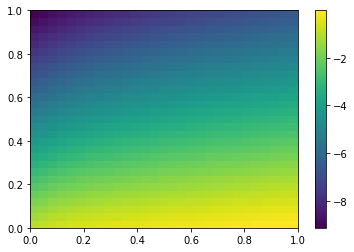

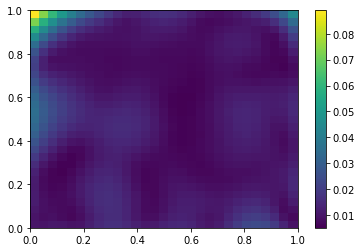

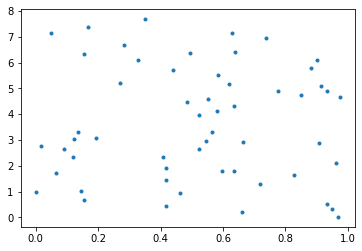

In [8]:
# plot model
n = 30
x = np.linspace(0, 1, n)
xx = np.meshgrid(x, x)
pts = torch.tensor(np.vstack((ele.ravel() for ele in xx)).T).double()

prob = ZDT1(2)

with torch.no_grad():
    pos = model(pts)
    mean = pos.mean
    var = pos.variance

    true = torch.transpose(prob.evaluate_true(pts), 0, 1)

print(true.shape)

fig2, ax2 = plt.subplots()
c = ax2.pcolor(*xx, mean[1].reshape(n, n))
fig2.colorbar(c)

fig2, ax2 = plt.subplots()
c = ax2.pcolor(*xx, torch.sqrt(var[1].reshape(n, n)))
fig2.colorbar(c)

fig, ax = plt.subplots()
ax.plot(train_y[:, 0], train_y[:, 1], '.')
